In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
def read_dataset():
    data = pd.read_csv('./data/banana.dat', comment='@', header=None)
    
    data.columns = ['x1', 'x2', 'y']
    
    return data

In [186]:
def plot_dataset(df, ax=None, marker='.'):

    # Proporção aproximada do domínio
#     plt.figure(figsize=(10 * 1.05,10))
    
    if ax is None:
        ax = plt
    
    p1 = ax.scatter(df[df.y > 0]['x1'], df[df.y > 0]['x2'],
                c=(0.50, 0.81, 0.84), label='+1', marker=marker)
    
    p2 = ax.scatter(df[df.y < 0]['x1'], df[df.y < 0]['x2'],
                c=(0.95, 0.54, 0.45), label='-1', marker=marker)
    
    ax.legend((p1, p2), ('+1', '-1'))
    
    return ax

In [68]:
def train_svm(df, kernel, k, **args):
    m = svm.SVC(kernel=kernel, **args)
    
    scores = cross_val_score(m, df[['x1', 'x2']], df['y'], cv=k, n_jobs=-1)
    
    train = df.sample(frac=k/100)
    
    m = m.fit(train[['x1', 'x2']], train['y'])
    
    return m, scores

In [24]:
def run_svm_test(df):
    
    parameters = [
        ('sigmoid', {'gamma': 1}),
        ('sigmoid', {'gamma': 0.5}),
        ('sigmoid', {'gamma': 0.01}),
        ('linear', {}),
        ('poly', {}),
        ('rbf', {})
    ]
    
    k_values = [ 2, 5, 10 ]
    
    results = dict()
    
    for k in k_values:
        
        results[k] = []
        
        for p in parameters:
            
            model, scores = train_svm(df, p[0], k, **p[1])
            
            r = { 
                'model' : model,
                'score': np.array(scores)
            }
            
            results[k].append(r)
            
    return results, parameters

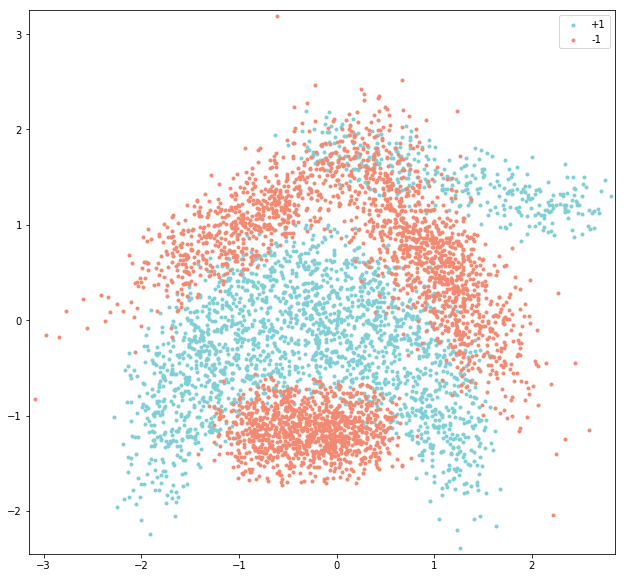

In [187]:
df = read_dataset()

plt.figure(figsize=(10 * 1.05,10))
ax = plot_dataset(df, plt.gca())

ax.set_xlim(-3.15, 2.85)
ax.set_ylim(-2.45, 3.25)

plt.show()

In [69]:
results, parameters = run_svm_test(df)

In [175]:
def make_meshgrid(x, y, h=.01):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
# def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    plt.contour(xx, yy, Z, colors=['black'], linewidths=0.25)
    return out

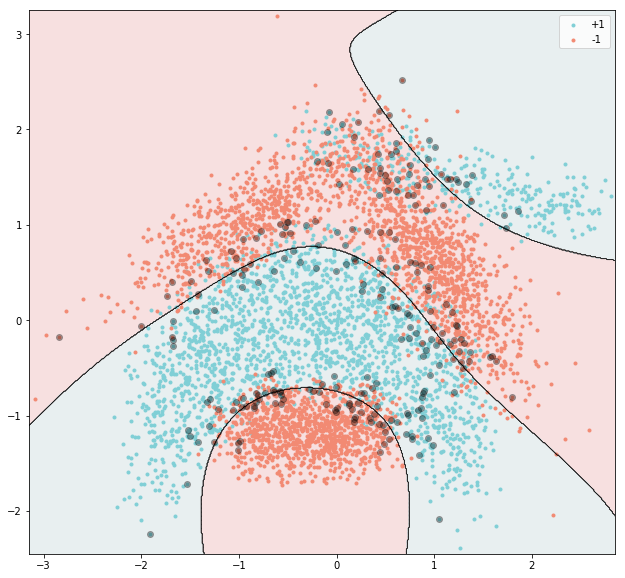

In [209]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10 * 1.05, 10)

xx, yy = make_meshgrid(df.iloc[:, 0], df.iloc[:, 1])

clf = results[10][5]['model']

ax.set_xlim(-3.15, 2.85)
ax.set_ylim(-2.45, 3.25)

plot_contours(ax, clf, xx, yy,
                  colors=[(0.96, 0.85, 0.85),
                         (0.89, 0.92, 0.93)], alpha=0.8)

ax = plot_dataset(df, ax=ax, marker='.')

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], marker='o', c='black', alpha=0.3)

plt.show()

In [72]:
for k in results:
    for i, r in enumerate(results[k]):
#         print(r['model'])
        print(parameters[i], 1 - np.mean(r['score']))

('sigmoid', {'gamma': 1}) 0.7181132075471698
('sigmoid', {'gamma': 0.5}) 0.7077358490566038
('sigmoid', {'gamma': 0.01}) 0.44830188679245286
('linear', {}) 0.44830188679245286
('poly', {}) 0.3633962264150943
('rbf', {}) 0.09622641509433971
('sigmoid', {'gamma': 1}) 0.718874599189516
('sigmoid', {'gamma': 0.5}) 0.7079336660789983
('sigmoid', {'gamma': 0.01}) 0.448301739018933
('linear', {}) 0.448301739018933
('poly', {}) 0.3609451399539497
('rbf', {}) 0.09792231371418192
('sigmoid', {'gamma': 1}) 0.7181157786316266
('sigmoid', {'gamma': 0.5}) 0.7069842353111037
('sigmoid', {'gamma': 0.01}) 0.4483018684887361
('linear', {}) 0.4483018684887361
('poly', {}) 0.3620768478353428
('rbf', {}) 0.09754364374304159


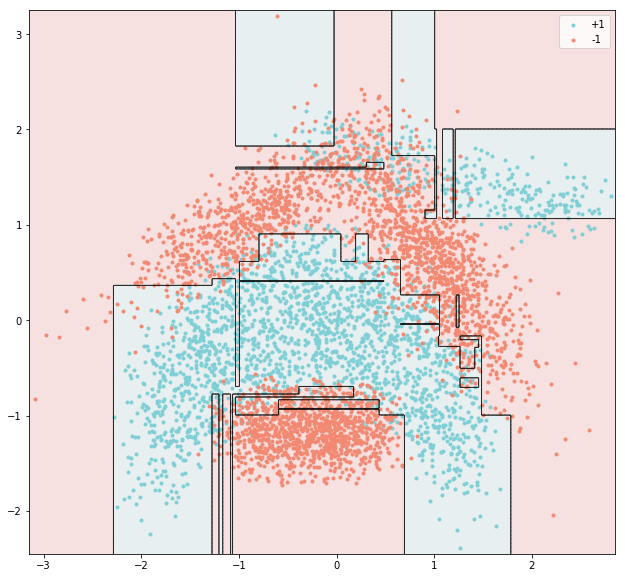

In [210]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10 * 1.05, 10)

clf = DecisionTreeClassifier()

k = 10

scores = np.array(cross_val_score(clf, df[['x1', 'x2']], df['y'], cv=k, n_jobs=-1))

train = df.sample(frac=k/100)
clf = clf.fit(train[['x1', 'x2']], train['y'])

ax.set_xlim(-3.15, 2.85)
ax.set_ylim(-2.45, 3.25)

plot_contours(ax, clf, xx, yy,
                  colors=[(0.96, 0.85, 0.85),
                         (0.89, 0.92, 0.93)], alpha=0.8)

ax = plot_dataset(df, ax=ax, marker='.')

plt.show()